# Analysis of b_eff results from HPCC

This notebook analyses the results of the latency/bandwidth measurements from the HPCC (HPC Challenge) benchmarks for a variety of HPC systems.

## Setup section

Load required modules and define useful functions

In [1]:
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def getbeffres(resfilename):
    infile = open(resfilename, 'r')
    pingpong = {}
    randring = {}
    natring = {}
    indata = False
    nline = 0
    for line in infile:
        if indata:
            nline += 1
            if nline == 2:
                # pp latency, e.g.:
                # Latency   min / avg / max:   0.001237 /   0.001749 /   0.004679 msecs
                line = line.strip()
                tokens = line.split()
                pingpong['min_lat'] = float(tokens[6])
                pingpong['mean_lat'] = float(tokens[8])
                pingpong['max_lat'] = float(tokens[10])
            elif nline == 3:
                # pp bw, e.g.:
                # Bandwidth min / avg / max:   3053.734 /   7057.902 /   8909.833 MByte/s
                line = line.strip()
                tokens = line.split()
                pingpong['min_bw'] = float(tokens[6])
                pingpong['mean_bw'] = float(tokens[8])
                pingpong['max_bw'] = float(tokens[10])
            elif nline == 5:
                # nat ring, e.g.:
                # On naturally ordered ring: latency= 0.001597 msec, bandwidth= 3773.552857 MB/s
                line = line.strip()
                tokens = line.split()
                randring['lat'] = float(tokens[5])
                randring['bw'] = float(tokens[8])
            elif nline == 6:
                # rand ring, e.g:
                # On randomly  ordered ring: latency= 0.003608 msec, bandwidth= 4065.500726 MB/s
                natring['lat'] = float(tokens[5])
                natring['bw'] = float(tokens[8])
                break
        else:
            if re.match('Detailed', line):
                indata = True
                nline = 0

    infile.close()

    return pingpong, randring, natring

In [9]:
def calcperf(filedict, cpn):
    coreslist = []
    rr_bw = []
    for nodes, filename in sorted(filedict.items()):
        pp, rr, nr = getbeffres(filename)
        coreslist.append(nodes*cpn)
        rr_bw.append(rr['bw'])
        print nodes, rr['bw']
    return coreslist, rr_bw
        

In [13]:
archerfiles = {2:'../beff_results/ARCHER/nodes2ppn24_201708301007_hpccoutf.txt',
               4:'../beff_results/ARCHER/nodes4ppn24_201708301006_hpccoutf.txt',
               8:'../beff_results/ARCHER/nodes8ppn24_201708301005_hpccoutf.txt',
               16:'../beff_results/ARCHER/nodes16ppn24_201708301004_hpccoutf.txt'}

In [14]:
archercpn = 36
archercores, archer_rrbw = calcperf(archerfiles, archercpn)

2 1376.705042
4 1350.659421
8 1311.693523
16 1233.618824


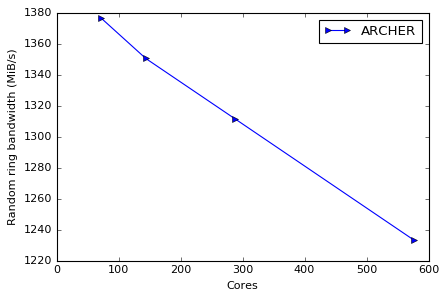

In [15]:
plt.plot(archercores, archer_rrbw, '>-', label='ARCHER')
plt.xlabel('Cores')
plt.ylabel('Random ring bandwidth (MiB/s)')
plt.legend(loc='best')